In [263]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Problem 1
## Part a

The AND gate can be created using a shallow neural network with two inputs and one output. For the activation function, I have chosen the sigmoid function.

The input is taken as a vector of reals $\vec{x} = [x_0, x_1]$ and the output is a single, real $a$. I have taken the weight matrix also as a vector $\vec{w} = [w_0, w_1]$. The bias is $b$. This gives us the equation as

\begin{aligned}
z &= \vec{w} \cdot \vec{x} + b \\
    &= w_0 x_0 + w_1 x_1 + b\\
a &= \sigma(z)
\end{aligned}

Now, by analyzing the truth table for AND, we can guess the weights and bias.
1. For $x=[0, 0]$, the output $z$ must be negative, hence, $b < 0$.
2. For $x=[0, 1], [1,0]$, the output is same implying that $w_0 = w_1$ may be required.
3. For $x=[1,1]$ the output must be positive or 0, hence $|b| \le (w_0 + w_1) $.

From this, we can conclude that $w_0 = 100, w_1 = w_0, b= -1.5w_0$ is a possible set of values that will work. A high value of the weight gives a "sharper" activation at the integer points.

In [264]:
def feed_forward(a0,w,b):
    num_layers = len(w)
    a = a0
    for ℓ in range(num_layers):
        z = np.dot(a,w[ℓ]) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a

In [265]:
N=[2,1]

w0=100.0
w1=w0
b0=-1.5*w0

w=[np.array([[w0], [w1]])]
b=[np.array([b0])]

# Printing the truth table as a test
print("Truth table")
print("x0", "x1", "a", sep='\t')
print("-"*50)

for x0 in range(2):
    for x1 in range(2):
        x=np.array([x0, x1])
        a1=feed_forward(x, w, b)
        print(x0, x1, a1[0], sep='\t')

Truth table
x0	x1	a
--------------------------------------------------
0	0	7.175095973164411e-66
0	1	1.928749847963918e-22
1	0	1.928749847963918e-22
1	1	1.0


In [266]:
# Plotting over a grid
grid_size = 200 # the size of the grid of input values

x = np.meshgrid(np.linspace(0,1.0,grid_size),np.linspace(0,1.0,grid_size))
xflat = [x[0].flatten(),x[1].flatten()]

In [267]:
batch_size = grid_size**2
a0 = np.zeros([batch_size,2])

a0[:,0]=xflat[0] # fill first component (index 0)
a0[:,1]=xflat[1] # fill second component
a1 = feed_forward(a0,w,b)
a1 = a1.reshape(grid_size,grid_size) # reshape for plotting

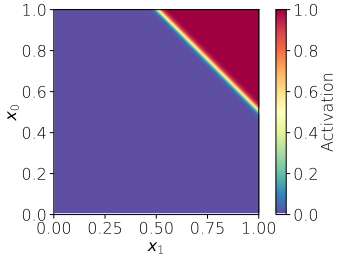

In [268]:
plt.imshow(a1, extent=[0,1.0,0,1.0], cmap='Spectral_r', rasterized=True, interpolation='lanczos', origin='lower')
plt.colorbar(label='Activation')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

So we see that the NN correctly gives the activation as $\approx 1.0$ when $x=[1,1]$. In the absence of hidden layers, it cannot predict values at non-integral values of $x$ very precisely as we guessed the weights to work at integer points only. Moreover, for a fixed $x_0$, the output as a function of $x_1$ can only be sigmoid and vice versa, hence, it cannot really "curve" to activate only in the $[1,1]$ region.

## Part b

The XOR gate can be decomposed as folows.

$A \bigoplus B = A \bar{B} + \bar{A} B$.

First, I can take the input $[x_0, x_1]$ and cast it into $[x_0, x_1, \bar{x_0}, \bar{x_1}]$.

The OR gate can be constructed by taking $b=-0.5 w_0$ in the AND gate. Similarly, a single input NOT gate can be constructed. Combining these, we get a next layer that has the results of the two AND gates, and by passing it through OR, we can make an XOR gate.

# Problem 2

In a PDF file in the folder.

# Problem 3
## Part a

In [269]:
filename = "C60_nmr.dat"
x, y = np.loadtxt(filename, unpack=True)

Text(0, 0.5, '$S(\\delta)$')

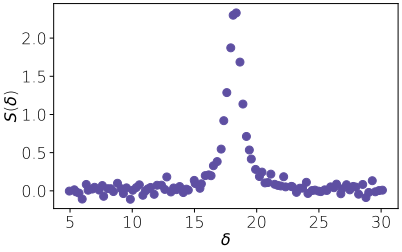

In [270]:
plt.plot(x, y, "o")
plt.xlabel(r"$\delta$")
plt.ylabel(r"$S(\delta)$")

## Part b

We will fit to the following function.

In [271]:
def S(w, δ): 
    return 1.0/( (δ-w[0])**2 + w[1] ) #This will give us the predicted value

Let the cost function be

$$C = \frac{1}{n} \sum_{n=1}^{N} (\bar{S}_n - S_n )^2$$

where $\bar{S}_n$ is the data point at the $n$-th $\delta$ and $S_n$ is the corresponding predicted value using the function shown above.

$\eta$ is the learning rate.

In [ ]:
from jax import jacfwd,grad
import jax.numpy as jnp

def S(w,δ):
    return 1/((δ-w[0])**2+w[1])

def cost(w,x,y):
    return 0.5*jnp.average((S(w,x)-y)**2)

w = jnp.array([18,.4],dtype=float)
v = jnp.array([0.,0.],dtype=float)

η=0.1
γ=0.05
num_iter = 1000
for i in range(num_iter):
    v = γ*v + η*grad(cost)(w,x,y)
    w -= v

In [ ]:
import json
data = {"alpha":float(w[0]),"beta":float(w[1]),"num_iter":num_iter,"eta":float(η)}
with open("C60_optimal.json","w") as outfile:
    json.dump(data,outfile,indent=1)


## Part c

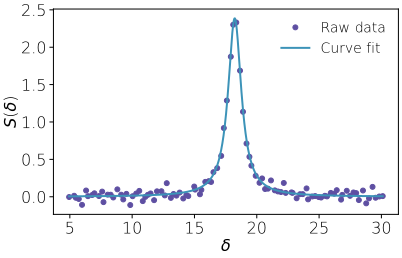

In [255]:
x_fit = np.linspace(x[0], x[-1], 1000)
y_fit = S(w, x_fit)    
plt.plot(x, y, "o", label="Raw data", markersize=5)
plt.plot(x_fit, y_fit, label="Curve fit")
plt.xlabel(r"$\delta$")
plt.ylabel(r"$S(\delta)$")
plt.legend()

## Part d

In [256]:
def S_fm(w,x):     
    return 1/S(w,x)

def cost_fm(w,x,y):
    return 0.5*jnp.average((S_fm(w,x)-y)**2)

y_fm = 1/y[45:55]
x_fm = x[45:55]
w_fm = jnp.array([18.0,4.0])

η=0.2
γ=0.0
v = 0

for i in range(num_iter):     
    w_fm -=  η*jacfwd(cost_fm)(w_fm,x_fm,y_fm)


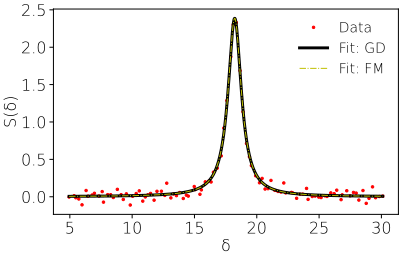

In [257]:
x_fit,y_fit = [],[]
x_fit = np.linspace(np.min(x),np.max(x),1000)
y_fit = S(w,x_fit)
y_fit2 = S(w_fm,x_fit)
plt.plot(x,y,'r.',label="Data", markersize=5)
plt.plot(x_fit,y_fit,'k-',label="Fit: GD", linewidth=3)
plt.plot(x_fit,y_fit,'y-.',label="Fit: FM", linewidth=1)
plt.xlabel('δ')
plt.ylabel('S(δ)')
plt.legend()

In [274]:
data = {"alpha": float(w[0]),
        "beta": float(w[1]),
        "alpha_fm": float(w_fm[0]),
        "beta_fm": float(w_fm[1]),
        "num_iter": num_iter,
        "eta": float(η)}
with open("C60_optimal.json","w") as outfile:
    json.dump(data,outfile,indent=1)